In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
inmate_df = pd.read_csv('incar_info.csv')
county_date_df = pd.read_csv('offender_county_details.csv')
inmate_sentence_df = pd.read_csv('sentence_and_release_details.csv')

/var/folders/kv/nl6qj61x3cb76zx8sn8pv4p40000gn/T/ipykernel_44264/3167379018.py:1: DtypeWarning: Columns (0,25,26,53,62,64) have mixed types. Specify dtype option on import or set low_memory=False.
  inmate_df = pd.read_csv('incar_info.csv')
/var/folders/kv/nl6qj61x3cb76zx8sn8pv4p40000gn/T/ipykernel_44264/3167379018.py:2: DtypeWarning: Columns (1,9) have mixed types. Specify dtype option on import or set low_memory=False.
  county_date_df = pd.read_csv('county_details.csv')


In [25]:
county_date_df['SENTENCE EFFECTIVE(BEGIN) DATE'] = pd.to_datetime(county_date_df["SENTENCE EFFECTIVE(BEGIN) DATE"], format=r"%Y-%m-%d", errors = 'coerce')
inmate_sentence_df['SENTENCE BEGIN DATE (FOR MAX)'] = pd.to_datetime(inmate_sentence_df["SENTENCE BEGIN DATE (FOR MAX)"], format=r"%Y-%m-%d", errors = 'coerce')

In [29]:
county_date_df['SENTENCE CONVICTION DATE'] = pd.to_datetime(county_date_df["SENTENCE CONVICTION DATE"], format=r"%Y-%m-%d", errors = 'coerce')

In [13]:
inmate_df['INMATE ADMISSION DATE'] = pd.to_datetime(inmate_df["INMATE ADMISSION DATE"], format=r"%Y-%m-%d", errors = 'coerce')

In [14]:
#this is for inmates csv
dates = pd.DataFrame(inmate_df['INMATE ADMISSION DATE'].dt.year)
dates = dates.sort_values(by=['INMATE ADMISSION DATE'], ignore_index=True)
dates.shape

(485858, 1)

<Axes: xlabel='INMATE ADMISSION DATE'>

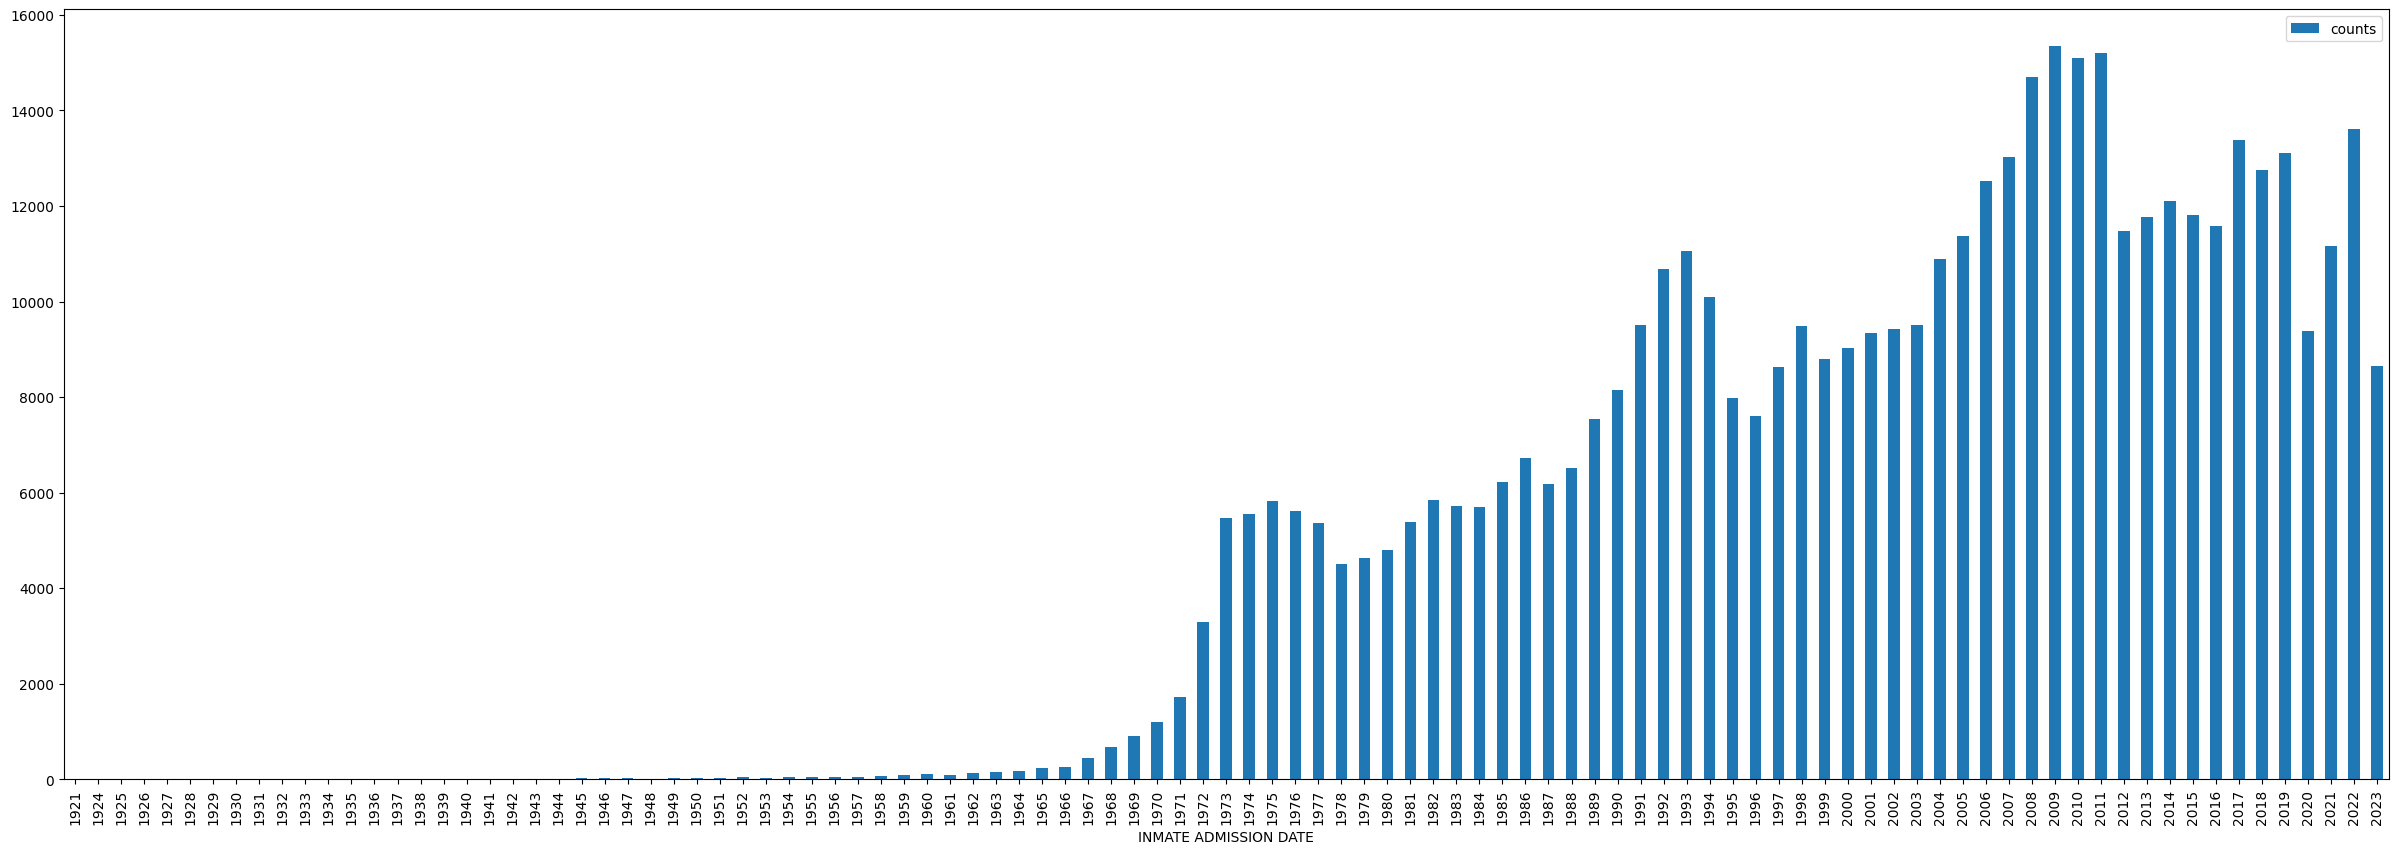

In [15]:
date_counts = dates['INMATE ADMISSION DATE'].value_counts().sort_index().rename_axis('INMATE ADMISSION DATE').reset_index(name='counts')
#date_counts = date_counts[:140]
date_counts.plot(x='INMATE ADMISSION DATE', y='counts', figsize=(30,10), kind='bar')

DEMOGRAPHICS ANALYSIS

In [20]:
inmate_county_df = county_date_df[county_date_df['OFFENDER NC DOC ID NUMBER'].isin(inmate_sentence_df['INMATE DOC NUMBER'])]
print(inmate_county_df.head())

   Unnamed: 0 OFFENDER NC DOC ID NUMBER COUNTY OF CONVICTION CODE   
3           3                         4                PERQUIMANS  \
4           4                         4                PERQUIMANS   
7           7                         6                CUMBERLAND   
8           8                         6                CUMBERLAND   
9           9                         6                CUMBERLAND   

  PRIMARY OFFENSE CODE DATE OFFENSE COMMITTED - BEGIN   
3     SELL SCHEDULE II                     0001-01-01  \
4     SELL SCHEDULE II                     0001-01-01   
7      WORTHLESS CHECK                     0001-01-01   
8      WORTHLESS CHECK                     0001-01-01   
9      WORTHLESS CHECK                     0001-01-01   

  DATE OFFENSE COMMITTED - END PRIMARY FELONY/MISDEMEANOR CD.   
3                   0001-01-01                          FELON  \
4                   0001-01-01                          FELON   
7                   0001-01-01                 

In [ ]:
# Adding leading 0s to have a 7 digit doc number
inmate_county_df['OFFENDER NC DOC ID NUMBER'] = inmate_county_df['OFFENDER NC DOC ID NUMBER'].apply(lambda x: '{0:0>7}'.format(x))


In [27]:
###### DEMOGRAPHICS ANALYSIS

## MAPPING NUMBER OF OFFENDERS TO COUNTY FOR ALL YEARS
unique_doc_id = (inmate_county_df['OFFENDER NC DOC ID NUMBER'].unique())


<Axes: xlabel='COUNTY OF CONVICTION CODE FOR EACH INDIVIDUAL OFFENSE'>

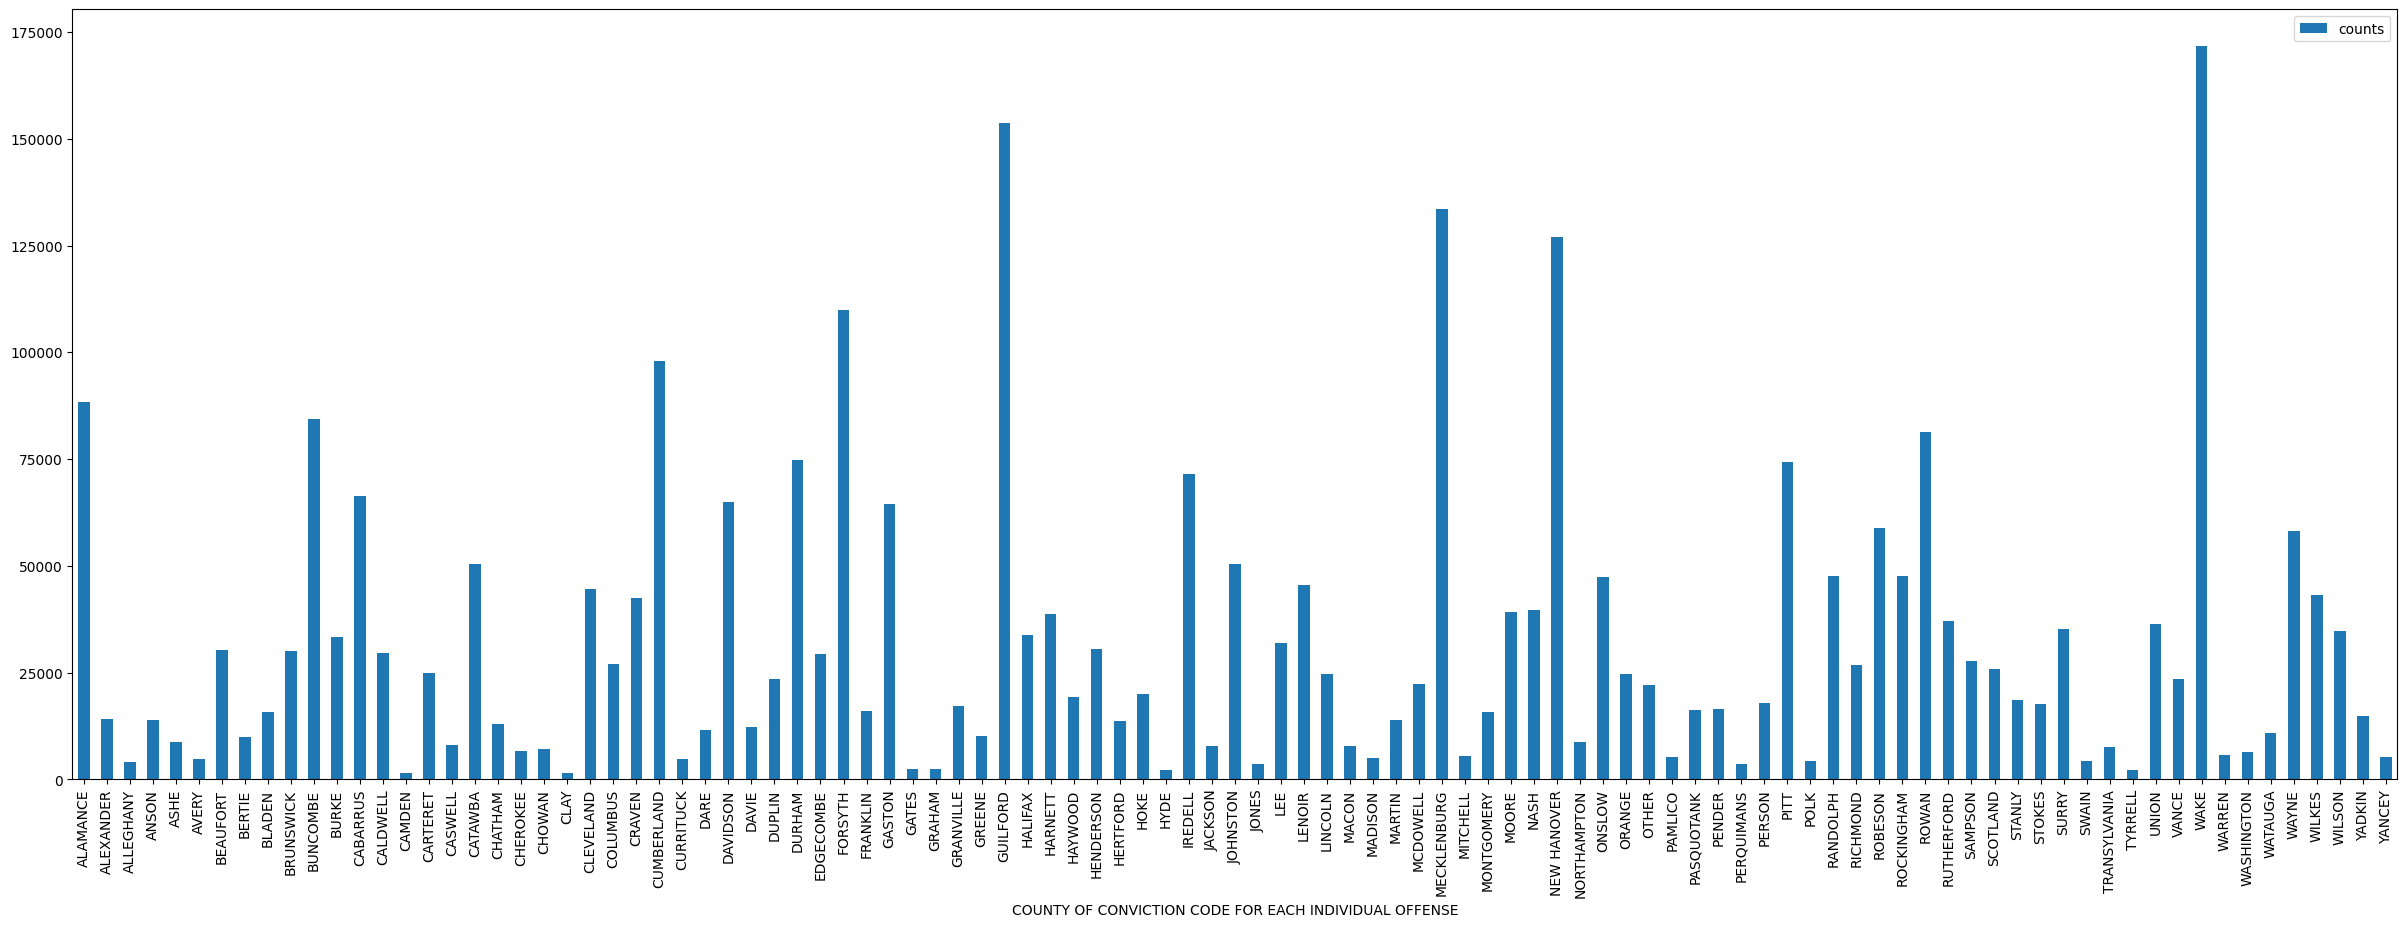

In [32]:
counties = inmate_county_df['COUNTY OF CONVICTION CODE'].value_counts().sort_index().rename_axis('COUNTY OF CONVICTION CODE FOR EACH INDIVIDUAL OFFENSE').reset_index(name='counts')
#date_counts = date_counts[:140]
counties.plot(x='COUNTY OF CONVICTION CODE FOR EACH INDIVIDUAL OFFENSE', y='counts', figsize=(30,10), kind='bar')

In [40]:
address_race_df = pd.read_csv('address_details.csv')
address_race_df = address_race_df[address_race_df['OFFENDER NC DOC ID NUMBER'].isin(inmate_sentence_df['INMATE DOC NUMBER'])]
address_race_df['OFFENDER NC DOC ID NUMBER'] = address_race_df['OFFENDER NC DOC ID NUMBER'].apply(lambda x: '{0:0>7}'.format(x))

/var/folders/kv/nl6qj61x3cb76zx8sn8pv4p40000gn/T/ipykernel_44264/1117427340.py:1: DtypeWarning: Columns (0,16,20) have mixed types. Specify dtype option on import or set low_memory=False.
  address_race_df = pd.read_csv('address_details.csv')


<Axes: xlabel='OFFENDER RACE CODE'>

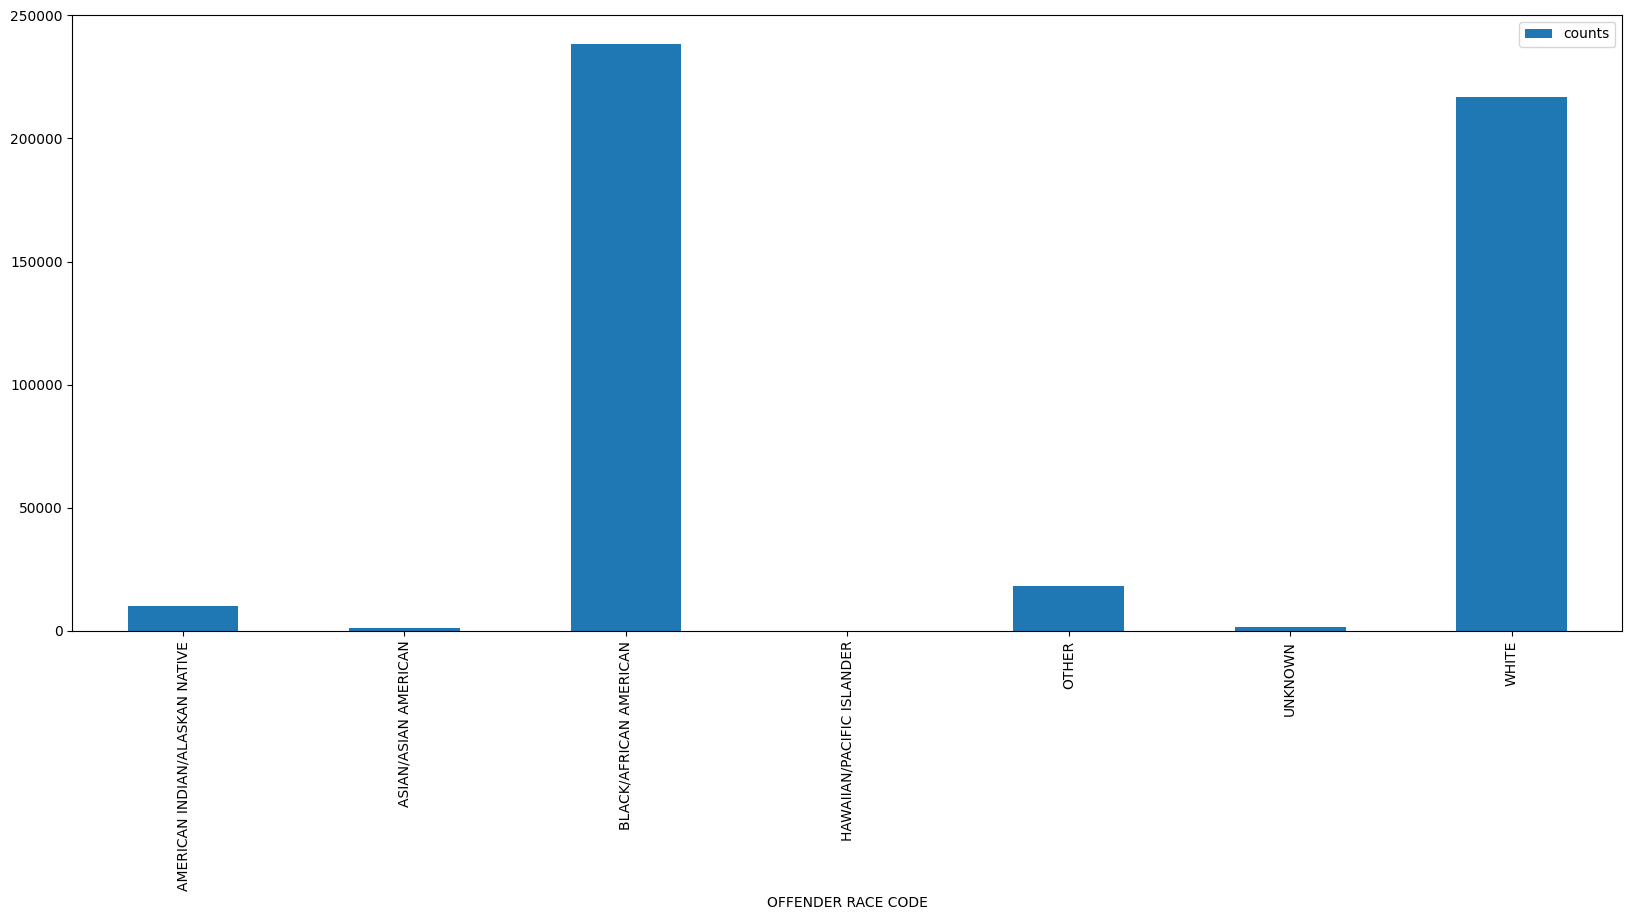

In [41]:
# NUMBER OF INMATES BASED ON RACE
race_count = address_race_df['OFFENDER RACE CODE'].value_counts().sort_index().rename_axis('OFFENDER RACE CODE').reset_index(name='counts')
race_count.plot(x='OFFENDER RACE CODE', y='counts', figsize=(20,8), kind='bar')
#address_race_df['OFFENDER RACE CODE'].unique()

In [48]:
county_race_df = pd.DataFrame()
county_race_df['DOC NUMBER'] = inmate_county_df['OFFENDER NC DOC ID NUMBER']
county_race_df['COUNTY OF CONVICTION'] = inmate_county_df['COUNTY OF CONVICTION CODE']

mapping = dict(zip(address_race_df['OFFENDER NC DOC ID NUMBER'], address_race_df['OFFENDER RACE CODE']))
county_race_df['RACE'] = county_race_df['DOC NUMBER'].map(mapping)
county_race_df.head()

,DOC NUMBER,COUNTY OF CONVICTION,RACE
3,0000004,PERQUIMANS,WHITE
4,0000004,PERQUIMANS,WHITE
7,0000006,CUMBERLAND,WHITE
8,0000006,CUMBERLAND,WHITE
9,0000006,CUMBERLAND,WHITE


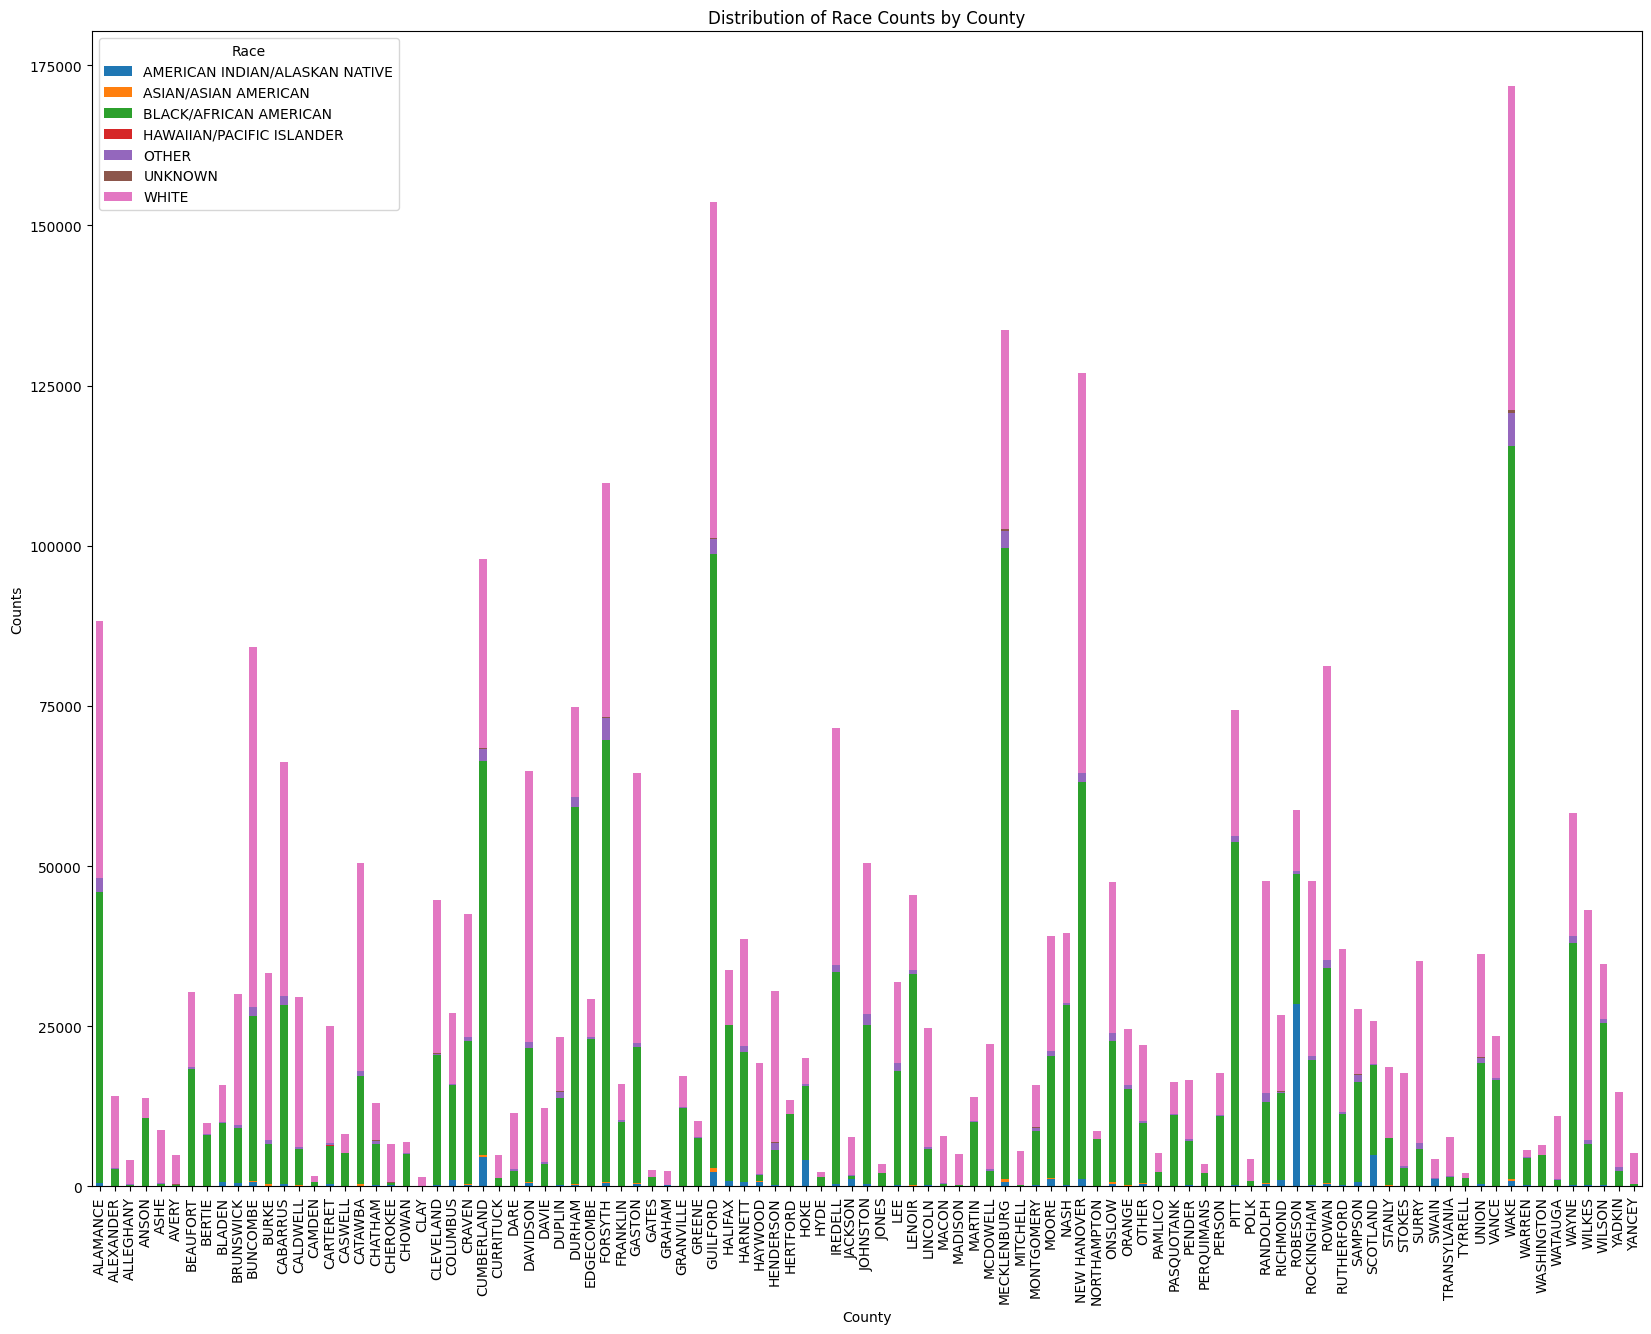

In [55]:
# Group by county and race, then count the occurrences
grouped = county_race_df.groupby(['COUNTY OF CONVICTION', 'RACE']).size().unstack()

# Plot the grouped bar chart
ax = grouped.plot(kind='bar', stacked=True, figsize=(20,15))
ax.set_xlabel('County')
ax.set_ylabel('Counts')
ax.set_title('Distribution of Race Counts by County')

#plt.figure(figsize=(20,10))
plt.legend(title='Race')
#plt.xticks(rotation=0)
#plt.tight_layout()
plt.show()

In [56]:
county_gender_df = pd.DataFrame()
county_gender_df['DOC NUMBER'] = inmate_county_df['OFFENDER NC DOC ID NUMBER']
county_gender_df['COUNTY OF CONVICTION'] = inmate_county_df['COUNTY OF CONVICTION CODE']

mapping = dict(zip(address_race_df['OFFENDER NC DOC ID NUMBER'], address_race_df['OFFENDER GENDER CODE']))
county_gender_df['GENDER'] = county_gender_df['DOC NUMBER'].map(mapping)
county_gender_df.head()

,DOC NUMBER,COUNTY OF CONVICTION,GENDER
3,0000004,PERQUIMANS,MALE
4,0000004,PERQUIMANS,MALE
7,0000006,CUMBERLAND,MALE
8,0000006,CUMBERLAND,MALE
9,0000006,CUMBERLAND,MALE


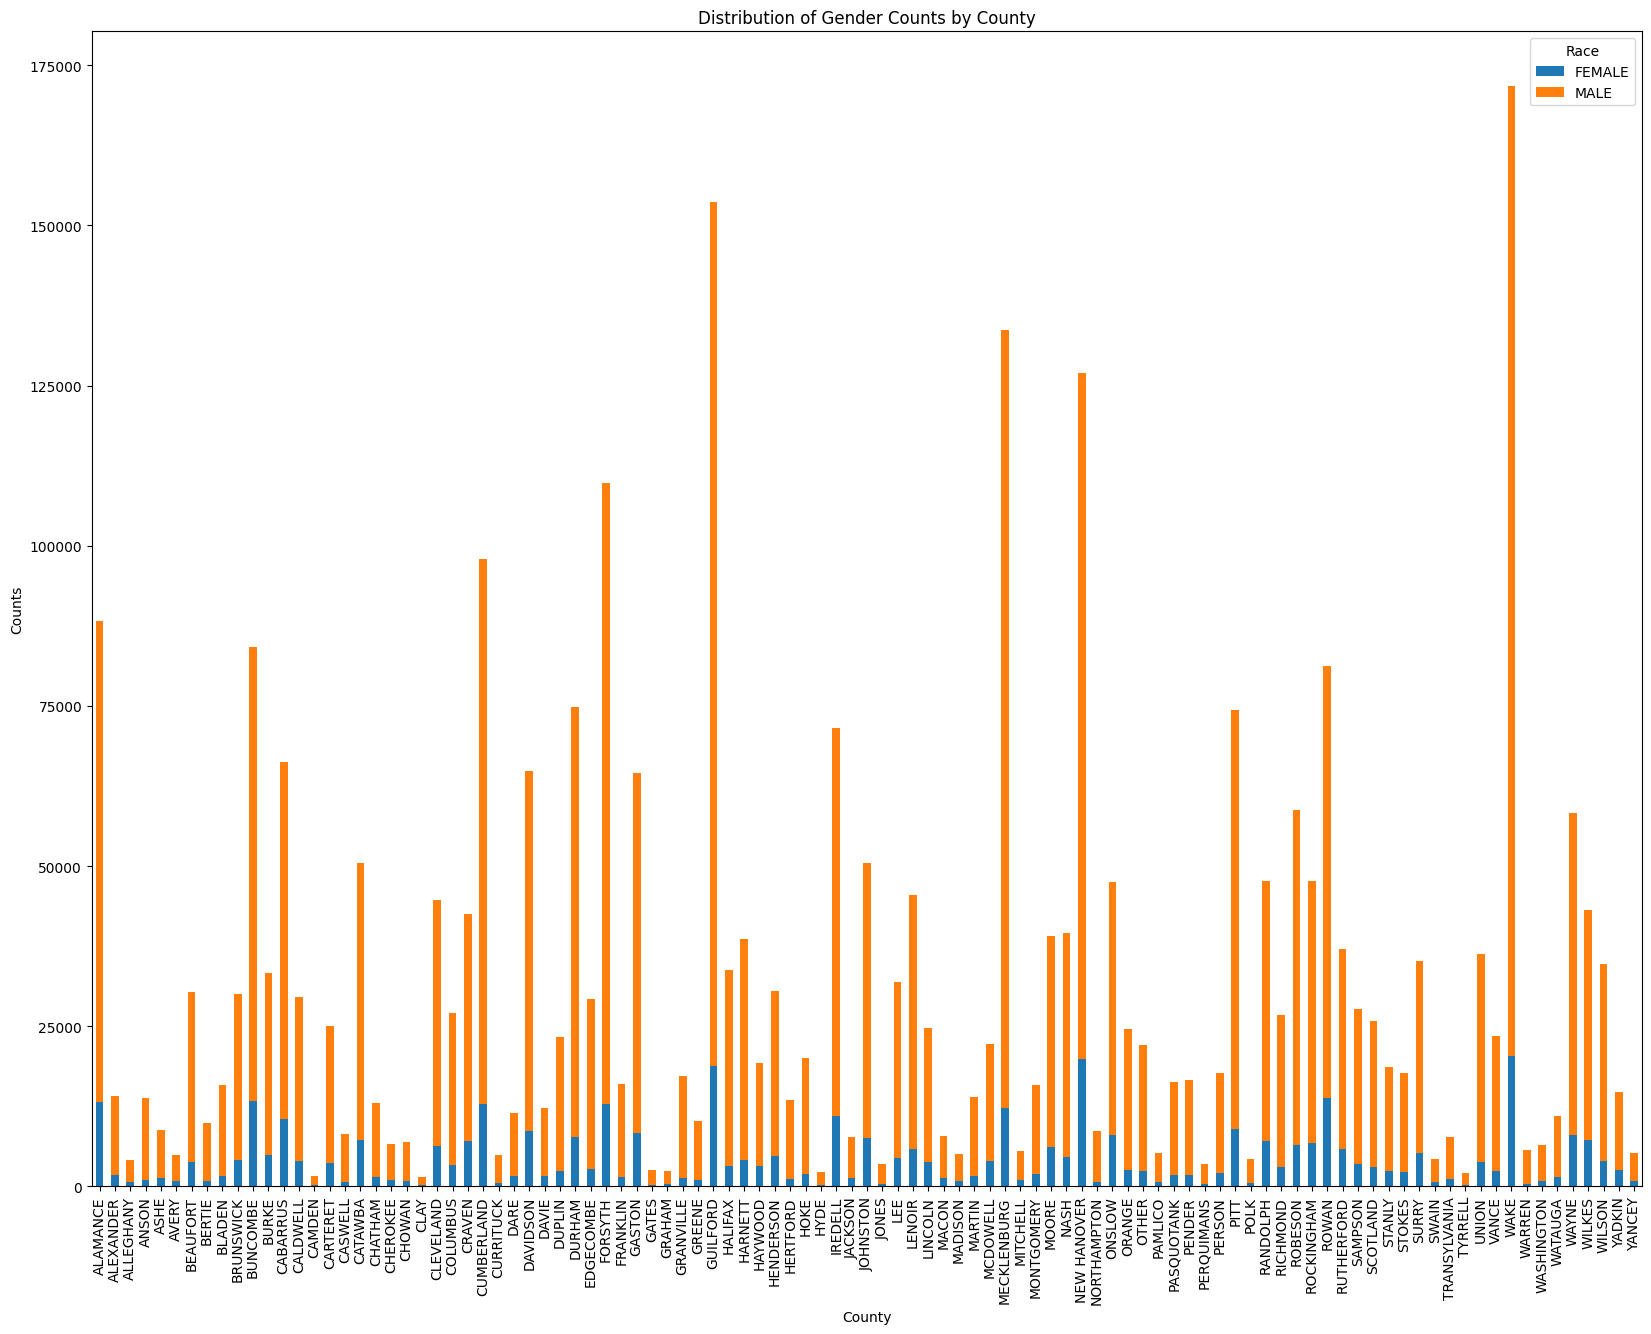

In [57]:
grouped = county_gender_df.groupby(['COUNTY OF CONVICTION', 'GENDER']).size().unstack()

# Plot the grouped bar chart
ax = grouped.plot(kind='bar', stacked=True, figsize=(20,15))
ax.set_xlabel('County')
ax.set_ylabel('Counts')
ax.set_title('Distribution of Gender Counts by County')

plt.legend(title='Race')
plt.show()

In [61]:
birth_county_race_df = pd.DataFrame()
birth_county_race_df['DOC NUMBER'] = address_race_df['OFFENDER NC DOC ID NUMBER']
birth_county_race_df['BIRTH COUNTY'] = address_race_df['NC COUNTY WHERE OFFENDER BORN']
birth_county_race_df['RACE'] = address_race_df['OFFENDER RACE CODE']

birth_county_race_df.head()

,DOC NUMBER,BIRTH COUNTY,RACE
2,0000004,OTHER,WHITE
4,0000006,CUMBERLAND,WHITE
6,0000008,NEW HANOVER,WHITE
7,0000010,OTHER,BLACK/AFRICAN AMERICAN
10,0000014,FORSYTH,WHITE


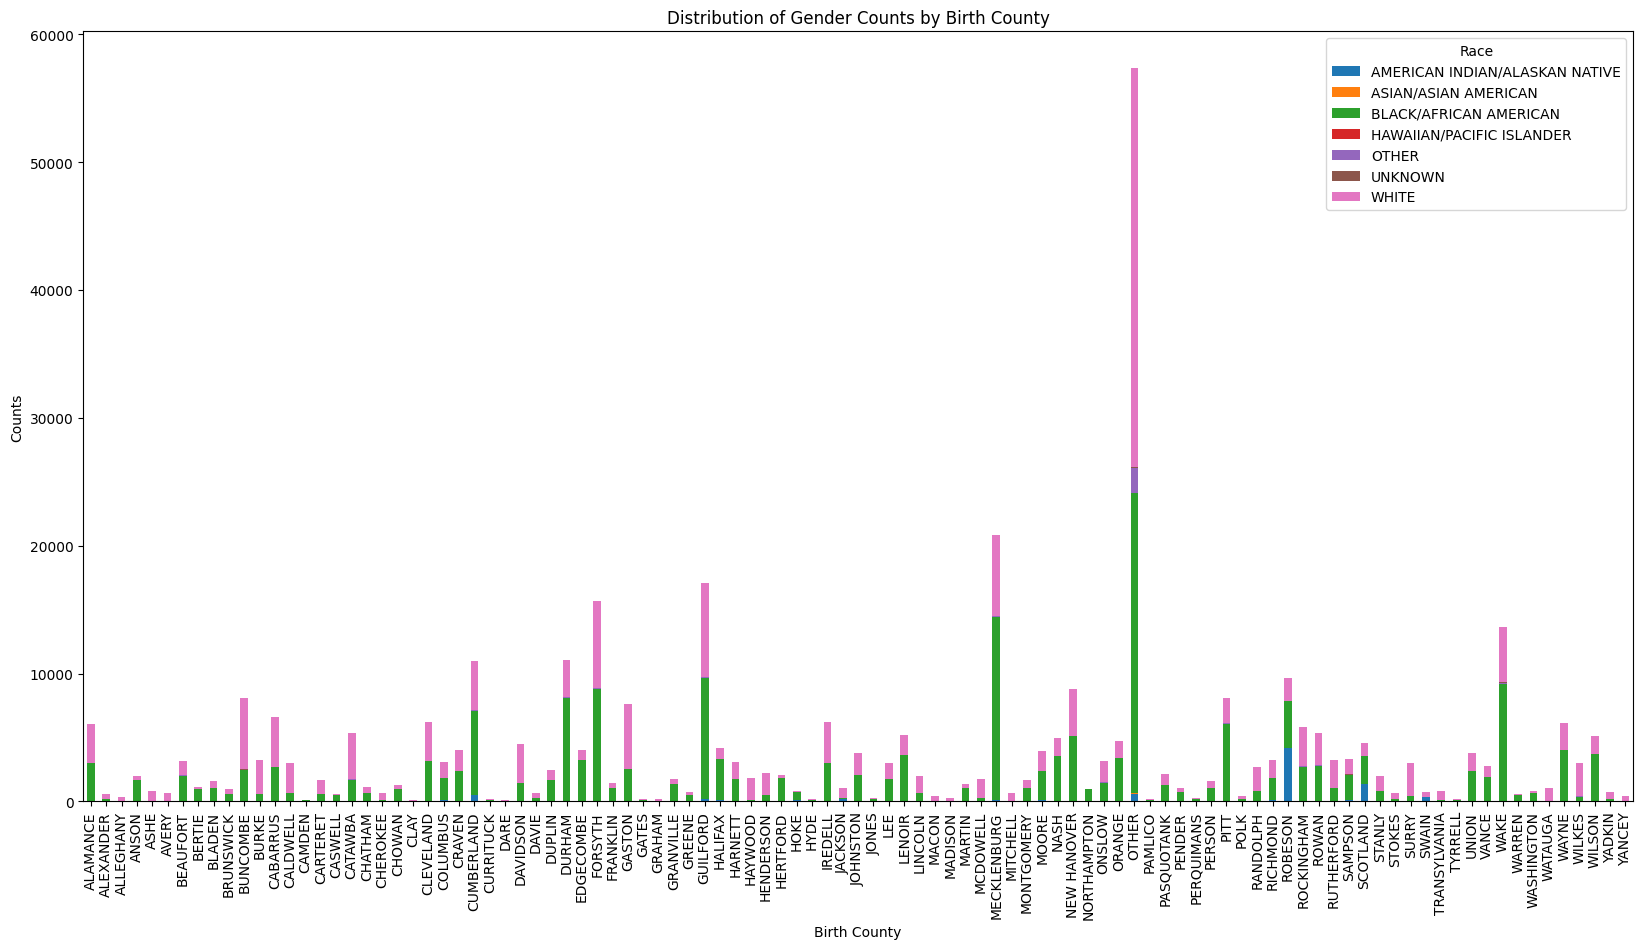

In [63]:
grouped = birth_county_race_df.groupby(['BIRTH COUNTY', 'RACE']).size().unstack()

# Plot the grouped bar chart
ax = grouped.plot(kind='bar', stacked=True, figsize=(20,10))
ax.set_xlabel('Birth County')
ax.set_ylabel('Counts')
ax.set_title('Distribution of Gender Counts by Birth County')

plt.legend(title='Race')
plt.show()